In [1]:
import pandas as pd
import numpy as np

# Loading the dataset

In [2]:
hr_df = pd.read_csv("E:/JYOTI/machine learning project/HR_comma_sep.csv")

In [3]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
hr_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

# Encoding Categorical Features

In [5]:
numerical_features = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company']

In [6]:
categorical_features = ['Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary']

# An utility function to create variable

In [7]:
def create_dummies( df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix= colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df= pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis= 1,inplace= True)
    return df

In [8]:
for c_feature in categorical_features:
    hr_df = create_dummies(hr_df, c_feature)

In [9]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident_1,left_1,promotion_last_5years_1,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


# Splitting the dataset

In [10]:
features_columns = hr_df.columns.difference( ['left_1'] )

In [11]:
features_columns

Index(['Work_accident_1', 'average_montly_hours', 'last_evaluation',
       'number_project', 'promotion_last_5years_1', 'salary_low',
       'salary_medium', 'sales_RandD', 'sales_accounting', 'sales_hr',
       'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'satisfaction_level',
       'time_spend_company'],
      dtype='object')

In [13]:
from sklearn.cross_validation import train_test_split
train_x, test_x, train_y, test_y = train_test_split( hr_df[features_columns],
                                                   hr_df['left_1'],
                                                   test_size = 0.2,
                                                   random_state = 42)

# Building Model

# Logistic regression model

In [2]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit( train_x, train_y )

NameError: name 'train_x' is not defined

In [15]:
list( zip( features_columns, logreg.coef_[0] ) )

[('Work_accident_1', -1.4926622788632982),
 ('average_montly_hours', 0.004975635141123221),
 ('last_evaluation', 0.5925855465931269),
 ('number_project', -0.3037334599863914),
 ('promotion_last_5years_1', -1.2172795027466676),
 ('salary_low', 1.8131728004170922),
 ('salary_medium', 1.3088621286592519),
 ('sales_RandD', -0.5707634899744979),
 ('sales_accounting', 0.09300314434497761),
 ('sales_hr', 0.35887729357832787),
 ('sales_management', -0.3623881644885348),
 ('sales_marketing', 0.13047438951784662),
 ('sales_product_mng', 0.023809273030965427),
 ('sales_sales', 0.07584182924720898),
 ('sales_support', 0.13493944208186445),
 ('sales_technical', 0.19545538895787432),
 ('satisfaction_level', -4.1082674410932025),
 ('time_spend_company', 0.2652983424072772)]

In [16]:
logreg.intercept_

array([-1.53003354])

# Predicting the test cases

In [17]:
hr_test_pred = pd.DataFrame( { 'actual': test_y,
                             'predicted': logreg.predict( test_x) } )

In [18]:
hr_test_pred = hr_test_pred.reset_index()

# Comparing the prediction with actual test data

In [19]:
hr_test_pred.sample( n = 10 )

,index,actual,predicted
803,12542,1,0
1378,10937,0,0
2816,6991,0,0
1336,2449,0,0
2080,7402,0,0
1750,6027,0,0
2303,2992,0,0
2324,12287,1,0
611,11412,0,0
1317,10175,0,0


# Creating a confusion matrix

In [20]:
from sklearn import metrics

cm = metrics.confusion_matrix( hr_test_pred.actual,
                             hr_test_pred.predicted, [1,0] )
cm

array([[ 225,  481],
       [ 175, 2119]], dtype=int64)

In [21]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib

Using matplotlib backend: Qt5Agg


Text(0.5,15,'predicted label')

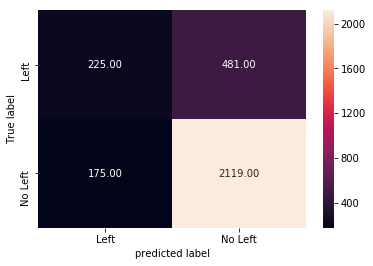

In [22]:
sn.heatmap(cm, annot=True, fmt='.2f' , xticklabels = ["Left" , "No Left"] , yticklabels = ["Left" , "No Left"] )
plt.ylabel('True label')
plt.xlabel('predicted label')

In [23]:
score = metrics.accuracy_score( hr_test_pred.actual, hr_test_pred.predicted )
round( float(score), 2 )

0.78

# Observation
Overall test accuracy is 78%. But it is not a good measure. The result is very high as there are lots of cases which are no left and the model has predicted most of them as no left.

The objective of the model is to indentify the people who will leave, so that the company can intervene and act.

This might be the case as the default model assumes people with more than 0.5 probability will not leave the company.

# Predict probability


In [25]:
test_x[:1]

,Work_accident_1,average_montly_hours,last_evaluation,number_project,promotion_last_5years_1,salary_low,salary_medium,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,satisfaction_level,time_spend_company
6723,1,226,0.96,5,0,0,1,0,0,0,0,1,0,0,0,0,0.65,2


In [26]:
logreg.predict_proba( test_x[:1])

array([[0.97203473, 0.02796527]])

# Note:
The model is predicting the probability of him leaving the company is only 0.027, which is very low.

# How good the model is?

In [27]:
predict_proba_df = pd.DataFrame( logreg.predict_proba( test_x ) )
predict_proba_df.head()

,0,1
0,0.972035,0.027965
1,0.917792,0.082208
2,0.770442,0.229558
3,0.523038,0.476962
4,0.975843,0.024157


In [28]:
hr_test_pred = pd.concat( [hr_test_pred, predict_proba_df], axis = 1 )

In [29]:
hr_test_pred.columns = ['index', 'actual', 'predicted', 'Left_0', 'Left_1']

In [30]:
auc_score = metrics.roc_auc_score( hr_test_pred.actual, hr_test_pred.Left_1 )
round( float( auc_score ), 2 )

0.81

C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\lib\function_base.py:838: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


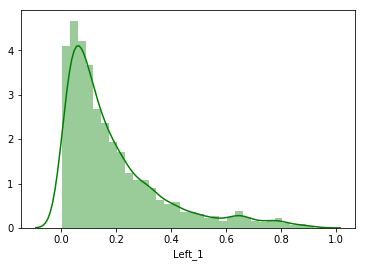

In [31]:
sn.distplot( hr_test_pred[hr_test_pred.actual == -1]["Left_1"], color = 'b' )
sn.distplot( hr_test_pred[hr_test_pred.actual == 0]["Left_1"], color = 'g' )

# Finding the optimal cutoff probability

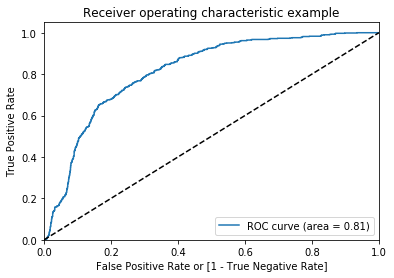

In [32]:
fpr, tpr, thresholds = metrics.roc_curve( hr_test_pred.actual,
                                     hr_test_pred.Left_1,
                                     drop_intermediate = False )

plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [33]:
thresholds[0:10]

array([1.91905394, 0.91905394, 0.90057484, 0.88605886, 0.88001359,
       0.8793385 , 0.87233292, 0.86974566, 0.86193265, 0.85880289])

In [34]:
fpr[0:10]

array([0.        , 0.00087184, 0.00130776, 0.00174368, 0.0021796 ,
       0.00261552, 0.00305144, 0.00348736, 0.00392328, 0.0043592 ])

In [35]:
tpr[0:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [36]:
cutoff_prob = thresholds[(np.abs(tpr - 0.7)).argmin()]

In [37]:
round( float( cutoff_prob ), 2 )

0.28

# Predicting with new cut-off probability

In [38]:
hr_test_pred['new_labels'] = hr_test_pred['Left_1'].map( lambda x: 1 if x >= 0.28 else 0 )

In [39]:
hr_test_pred[0:10]

,index,actual,predicted,Left_0,Left_1,new_labels
0,6723,0,0,0.972035,0.027965,0
1,6473,0,0,0.917792,0.082208,0
2,4679,0,0,0.770442,0.229558,0
3,862,1,0,0.523038,0.476962,1
4,7286,0,0,0.975843,0.024157,0
5,8127,0,0,0.722851,0.277149,0
6,3017,0,0,0.985596,0.014404,0
7,3087,0,1,0.130254,0.869746,1
8,6425,0,0,0.769714,0.230286,0
9,2250,0,1,0.398617,0.601383,1


Text(0.5,15,'Predicted label')

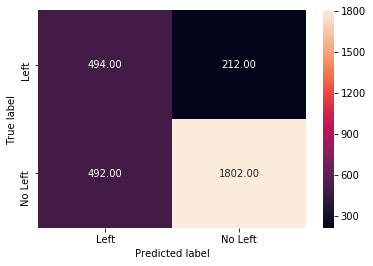

In [40]:
cm = metrics.confusion_matrix( hr_test_pred.actual,
                          hr_test_pred.new_labels, [1,0] )
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Building decision tree

In [42]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
from sklearn.grid_search import GridSearchCV

In [43]:
param_grid = {'max_depth': np.arange(3, 10)}

tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 10)
tree.fit( train_x, train_y )

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [44]:
tree.best_params_

{'max_depth': 8}

In [45]:
tree.best_score_

0.9802483540295025

# Build final decision tree model

In [46]:
clf_tree = DecisionTreeClassifier( max_depth = 9 )
clf_tree.fit( train_x, train_y, )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#  Observation:

    wow the accuracy is about 98%.

In [47]:
tree_test_pred = pd.DataFrame( { 'actual': test_y,
                            'predicted': clf_tree.predict( test_x ) } )

In [48]:
tree_test_pred.sample( n = 10 )

,actual,predicted
13781,0,0
8299,0,0
4448,0,0
9515,0,0
10594,0,0
1621,1,1
5082,0,0
4817,0,0
2095,0,1
9682,0,0


In [49]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.9783333333333334

Text(0.5,15,'Predicted label')

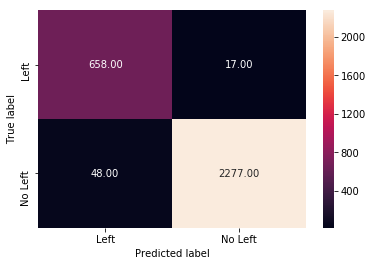

In [50]:
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,
                                 tree_test_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

# Random Forest model

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
radm_clf = RandomForestClassifier()
radm_clf.fit( train_x, train_y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [53]:
radm_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': radm_clf.predict( test_x ) } )

In [54]:
metrics.accuracy_score( radm_test_pred.actual, radm_test_pred.predicted )

0.987

Text(0.5,15,'Predicted label')

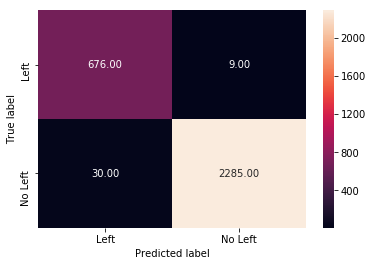

In [55]:
tree_cm = metrics.confusion_matrix( radm_test_pred.predicted,
                                 radm_test_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

# feature importance from Random Forest Model

In [56]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]

In [58]:
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_x.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_x.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]

In [1]:
sn.barplot( y = 'feature', x = 'importance', data = feature_rank )

NameError: name 'sn' is not defined

# Note:
As per the model, the most important features which influence whether to leave the company,in descending order, are

satisfaction_level,
number_project,
time_spend_company,
last_evaluation,
average_montly_hours,
work_accident,





